<a href="https://colab.research.google.com/github/gnurt2041/Football-Match-Analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Track + analyze football matches through broadcast video using
# YOLOv5 + ByteTrack + HSV Classifier

## First you need to connect this colab notebook to to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Check the GPU device info

In [2]:
!nvidia-smi

Thu Jun 29 12:48:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Get root direction

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone the yolov5 github from ultralytics into your drive

In [ ]:
%cd {HOME}/drive/MyDrive/
!git clone https://github.com/ultralytics/yolov5

After cloned yolov5 github, you have to open yolov5/models/common.py file in yolov5 folder in your drive.

You need to change the 'stride' parameter in line 338 from 32 to 64

Because the default code is for P5 version but my model is P6 version which use stride = 64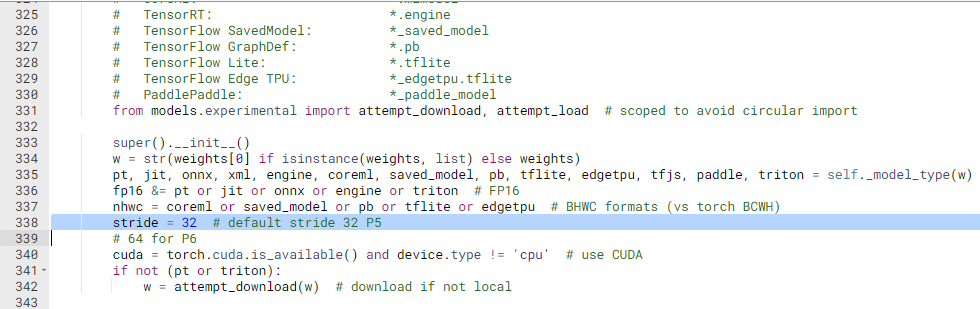

Then restart the runtime to run perfectly. From now, you don't need to clone and change anything in the yolov5 folder.

Install requirements packages to run yolov5

In [4]:
%cd {HOME}/drive/MyDrive/yolov5
!pip install -qr requirements.txt

import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


## If you want to run inference in TensorRT, you can run the next 6 code cells. If not, just don't run it

In [53]:
%cd {HOME}/drive/MyDrive/
!git clone https://github.com/ultralytics/yolov5 -b update/bench_gpu  # clone
%cd {HOME}/drive/MyDrive/yolov5
!pip install -qr requirements.txt coremltools onnx onnxruntime-gpu openvino-dev  # install
!pip install -U -q nvidia-tensorrt --index-url https://pypi.ngc.nvidia.com  # TensorRT

/content/drive/MyDrive
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (s

In [ ]:
%cd {HOME}/drive/MyDrive/yolov5
!python export.py --weights /content/drive/MyDrive/best5.pt --include engine --device 0 --img 720 1280  --batch-size 1 --half --workspace 10

### Download deb file of tensorrt package(1.4GB). I downloaded the proper version with google colab and yolov5 pytorch. You can use the code below to download it into your drive

In [ ]:
!gdown https://drive.google.com/file/d/16vD0QMzqPUgyHHaWKPAHHocHscG2SvWT/view

In [54]:
!dpkg -i /content/drive/MyDrive/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8_1.0-1_amd64.deb
!cp /var/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8/nv-tensorrt-local-D7BB1B18-keyring.gpg /usr/share/keyrings/
!apt-get update

Selecting previously unselected package nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8_1.0-1_amd64.deb ...
Unpacking nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8 (1.0-1) ...
Setting up nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8 (1.0-1) ...

The public nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8 GPG key does not appear to be installed.
To install the key, run this command:
sudo cp /var/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8/nv-tensorrt-local-D7BB1B18-keyring.gpg /usr/share/keyrings/

Get:1 file:/var/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8  InRelease [1,572 B]
Get:1 file:/var/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8  InRelease [1,572 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004

In [55]:
import os
deb_dir = '/var/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8'

for subdir,dirs,files in os.walk(deb_dir):
  for file in files:
    if file[-3:] =='deb':
       print('!dpkg -i '+ file)

!dpkg -i tensorrt-libs_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvparsers-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-dispatch8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-vc-plugin-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i python3-libnvinfer-lean_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-lean8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-samples_8.6.1.6-1+cuda11.8_all.deb
!dpkg -i python3-libnvinfer-dispatch_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-lean-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i python3-libnvinfer_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-plugin-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i uff-converter-tf_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i tensorrt_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-dispatch-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-vc-plugin8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-plugin8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i python3-libnvin

In [56]:
%cd /var/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8
!dpkg -i libnvinfer-plugin8_8.6.1.6-1+cuda11.8_amd64.deb
# !dpkg -i python3-libnvinfer-lean_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i graphsurgeon-tf_8.6.1.6-1+cuda11.8_amd64.deb
# !dpkg -i python3-libnvinfer_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvparsers8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer8_8.6.1.6-1+cuda11.8_amd64.deb
# !dpkg -i python3-libnvinfer-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvonnxparsers-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-dispatch8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvonnxparsers8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvparsers-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-bin_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-lean8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i tensorrt-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i tensorrt_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-vc-plugin8_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-samples_8.6.1.6-1+cuda11.8_all.deb
!dpkg -i uff-converter-tf_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-vc-plugin-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i onnx-graphsurgeon_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-plugin-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-headers-plugin-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-lean-dev_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-dispatch-dev_8.6.1.6-1+cuda11.8_amd64.deb
# !dpkg -i python3-libnvinfer-dispatch_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i tensorrt-libs_8.6.1.6-1+cuda11.8_amd64.deb
!dpkg -i libnvinfer-headers-dev_8.6.1.6-1+cuda11.8_amd64.deb

/var/nv-tensorrt-local-repo-ubuntu2004-8.6.1-cuda-11.8
Selecting previously unselected package libnvinfer-plugin8.
(Reading database ... 123110 files and directories currently installed.)
Preparing to unpack libnvinfer-plugin8_8.6.1.6-1+cuda11.8_amd64.deb ...
Unpacking libnvinfer-plugin8 (8.6.1.6-1+cuda11.8) ...
dpkg: dependency problems prevent configuration of libnvinfer-plugin8:
 libnvinfer-plugin8 depends on libnvinfer8 (= 8.6.1.6-1+cuda11.8); however:
  Package libnvinfer8 is not installed.

dpkg: error processing package libnvinfer-plugin8 (--install):
 dependency problems - leaving unconfigured
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Errors were encountered while processing:
 libnvinfer-plugin8
Selecting previously unselected package graphsurgeon-tf.
(Reading database ... 123115 files and directories currently installed.)
Preparing to unpack graphsurgeon-tf_8.6.1.6-1+cuda11.8_amd64.deb ...
Unpacking graphsurgeon-tf (8.6.1.6-1+cuda11.8) ...
Setting up graphsurgeon-

Check TensorRT installation

In [57]:
!cat /etc/issue
!nvcc -V
!python -V
!dpkg -l | grep "cudnn"
!dpkg -l | grep nvinfer
!dpkg-query -W tensorrt

Ubuntu 20.04.6 LTS \n \l

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
Python 3.10.12
hi  libcudnn8                                         8.9.0.131-1+cuda11.8              amd64        cuDNN runtime libraries
ii  libcudnn8-dev                                     8.9.0.131-1+cuda11.8              amd64        cuDNN development libraries and headers
iU  libnvinfer-bin                                    8.6.1.6-1+cuda11.8                amd64        TensorRT binaries
iU  libnvinfer-dev                                    8.6.1.6-1+cuda11.8                amd64        TensorRT development libraries
iU  libnvinfer-dispatch-dev                           8.6.1.6-1+cuda11.8                amd64        TensorRT development dispatch runtime libraries
ii  libnvinfer-dispatch8                              8.6.1.6-1+cuda11.8             

# Use torch hub to load model from weight path
# My pretrained path have two types: .pt for pytorch and .engine for tensorrt

In [51]:
WEIGHT_PATH = f"{HOME}/drive/MyDrive/best5.pt"
ENGINE_PATH = f"{HOME}/drive/MyDrive/best5.engine"

In [58]:
%cd {HOME}/drive/MyDrive/yolov5
import torch
model = torch.hub.load('.', 'custom', ENGINE_PATH, source='local')

/content/drive/MyDrive/yolov5


YOLOv5 🚀 v7.0-185-g2334aa7 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /content/drive/MyDrive/best5.engine for TensorRT inference...
Adding AutoShape... 


In [7]:
model.names = ['ball', 'goalkeeper', 'player', 'referee']
model.names

['ball', 'goalkeeper', 'player', 'referee']

# Clone ByteTrack github for tracking task

In [8]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git



/content
Cloning into 'ByteTrack'...
remote: Enumerating objects: 2007, done.
remote: Total 2007 (delta 0), reused 0 (delta 0), pack-reused 2007
Receiving objects: 100% (2007/2007), 79.60 MiB | 16.84 MiB/s, done.
Resolving deltas: 100% (1141/1141), done.


Install requirement packages for ByteTrack

Some other packages are for requirement package.

In [9]:
%cd {HOME}/ByteTrack

# !sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt
!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
!pip install -q loguru lap
!pip install onemetric --quiet
from IPython import display
display.clear_output()

# Clone my github to run analytics and annotations

In [59]:
%cd /content/drive/MyDrive
!git clone https://github.com/gnurt2041/Football-Match-Analysis.git


/content/drive/MyDrive
fatal: destination path 'Football-Match-Analysis' already exists and is not an empty directory.


# Arguments for run
In google colab you can't use arguments from module, so you have to write and run it in code cell

In [43]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument(
    "--source",
    default="./test.mp4",
    type=str,
    help="Path to the input "
)
parser.add_argument(
    "--model", default="/model.pt", type=str, help="Path to the model"
)
parser.add_argument(
    "--fps", default=30, type=int, help="FPS of the video"
)
parser.add_argument(
    "--possession",
    action="store_false",
    help="Enable possession counter"
)
parser.add_argument(
        "--possession_threshold",
        type=int,
        default=15,
        help="Amount of consecutive frames new team has to have the ball in order to change possession"
)
parser.add_argument(
        "--ball_conf",
        type=float,
        default=0.4,
        help="Ball confidence threshold"
)
parser.add_argument(
    "--teams_name",
    nargs='+',
    type=str,
    default=['MUN','SEV'],
    help="Name of two teams"
)
parser.add_argument(
    "--colors",
    nargs='+',
    type=str,
    default=[],
    help="Colors of two teams and refee, format: [c1,c2,c3,c4,c5] -> [T1,T1,T2,T2,R]"
)
parser.add_argument(
    "--color_t1",
    nargs='+',
    type=str,
    default=['red','blue','sky_blue','blueish_red'], #['sky_blue','orange'], # ['sky_blue','blueish_red','red']
    help="Colors of two teams and refee, format: [c1,c2] -> [T1,T1]"
)
parser.add_argument(
    "--color_t2",
    nargs='+',
    type=str,
    default=['white','yellow'],   #['black','red'], # ['blue','orange']
    help="Colors of two teams and refee, format: [c3,c4] -> [T2,T2]"
)
parser.add_argument(
    "--color_rf",
    type=str,
    default='black', # 'yellow'
    help="Colors of two teams and refee, format: [c5] -> [R]"
)
parser.add_argument(
    "--colors_draw",
    nargs='+',
    type=str,
    default=['blue','salmon','yellow'],
    help="Colors to draw classification of teams and refee, format: [c1,c2,c3] -> [T1,T2,R]"
)
parser.add_argument(
    "--board_colors",
    nargs='+',
    type=tuple,
    default=['',''],
    help="Colors to draw classification of teams and refee, format: [c1,c2,c3] -> [T1,T2,R]"
)
parser.add_argument(
    "--text_colors",
    nargs='+',
    type=tuple,
    default=['',''],
    help="Colors to draw classification of teams and refee, format: [c1,c2,c3] -> [T1,T2,R]"
)
args = parser.parse_args(args=[])
print(args)

Namespace(source='./test.mp4', model='/model.pt', fps=30, possession=True, possession_threshold=15, ball_conf=0.4, teams_name=['MUN', 'SEV'], colors=[], color_t1=['red', 'blue', 'sky_blue', 'blueish_red'], color_t2=['white', 'yellow'], color_rf='black', colors_draw=['blue', 'salmon', 'yellow'], board_colors=['', ''], text_colors=['', ''])


# All necessary modules and libaries

In [16]:
import sys
sys.path.insert(0, '/content/ByteTrack')

In [60]:

import matplotlib
from tqdm.notebook import tqdm
from analysis.filter import filters
from analysis.hsv_classifier import HSVClassifier
from analysis.inertia_classifier import InertiaClassifier
from analysis.colors import Color
from draw.annotate import BaseAnnotator
from draw.marker import MarkerAnntator
from util.detection import Detection, filter_class, filter_classification, true_ball
from util.track import BYTETrackerArgs, detections2boxes, tracks2boxes, match_detections_with_tracks
from draw.draw_possession import get_possession_background, draw_possession_counter
from analysis.possession import get_player_in_possession, get_team_in_possession, inertia_possession
from util.video import Video
import PIL

from yolox.tracker.byte_tracker import BYTETracker

# Color for annotate and board possession

In [61]:

# red
HOME_COLOR_HEX = matplotlib.colors.cnames[args.colors_draw[0]]
HOME_COLOR = Color.from_hex_string(HOME_COLOR_HEX)

# green
AWAY_COLOR_HEX = matplotlib.colors.cnames[args.colors_draw[1]]
AWAY_COLOR = Color.from_hex_string(AWAY_COLOR_HEX)

# possession board and text color
HOME_BOARD_HEX = matplotlib.colors.cnames['skyblue']
args.board_colors[0] = Color.from_hex_string(HOME_BOARD_HEX).bgr_tuple
HOME_TEXT_HEX = matplotlib.colors.cnames['white']
args.text_colors[0] = Color.from_hex_string(HOME_TEXT_HEX).bgr_tuple
AWAY_BOARD_HEX = matplotlib.colors.cnames['royalblue']
args.board_colors[1] = Color.from_hex_string(AWAY_BOARD_HEX).bgr_tuple
AWAY_TEXT_HEX = matplotlib.colors.cnames['white']
args.text_colors[1] = Color.from_hex_string(AWAY_TEXT_HEX).bgr_tuple

# yellow
REFEREE_COLOR_HEX = matplotlib.colors.cnames[args.colors_draw[2]]
REFEREE_COLOR = Color.from_hex_string(REFEREE_COLOR_HEX)

# Color for marker of ball and closest player

In [62]:
# black
MARKER_CONTOUR_COLOR_HEX = "000000"
MARKER_CONTOUR_COLOR = Color.from_hex_string(MARKER_CONTOUR_COLOR_HEX)

# red
PLAYER_MARKER_FILL_COLOR_HEX = "FF0000"
PLAYER_MARKER_FILL_COLOR = Color.from_hex_string(PLAYER_MARKER_FILL_COLOR_HEX)

# green
BALL_MERKER_FILL_COLOR_HEX = "00FF00"
BALL_MARKER_FILL_COLOR = Color.from_hex_string(BALL_MERKER_FILL_COLOR_HEX)

MARKER_CONTOUR_THICKNESS = 2
MARKER_WIDTH = 15
MARKER_HEIGHT = 15
MARKER_MARGIN = 7

# distance in pixels from the player's bounding box where we consider the ball is in his possession
PLAYER_IN_POSSESSION_PROXIMITY = 40

# Path for test video and board possession image
## Plot image of video testing for make sure the source isn't none

In [63]:
import sys
sys.path.insert(0, '/content/drive/MyDrive/Football-Match-Analysis/football')

In [64]:
SOURCE_VIDEO_PATH = f"{HOME}/drive/MyDrive/samples/mun_sev_test.mp4"
BOARD_IMG_PATH = f"{HOME}/drive/MyDrive/Football-Match-Analysis/football/draw/possession_board.png"

In [65]:
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np

import cv2

%matplotlib inline


def generate_frames(video_file: str) -> Generator[np.ndarray, None, None]:
    video = cv2.VideoCapture(video_file)

    while video.isOpened():
        success, frame = video.read()

        if not success:
            break

        yield frame

    video.release()


def plot_image(image: np.ndarray, size: int = 12) -> None:
    plt.figure(figsize=(size, size))
    plt.axis('off')
    plt.imshow(image[...,::-1])
    plt.show()

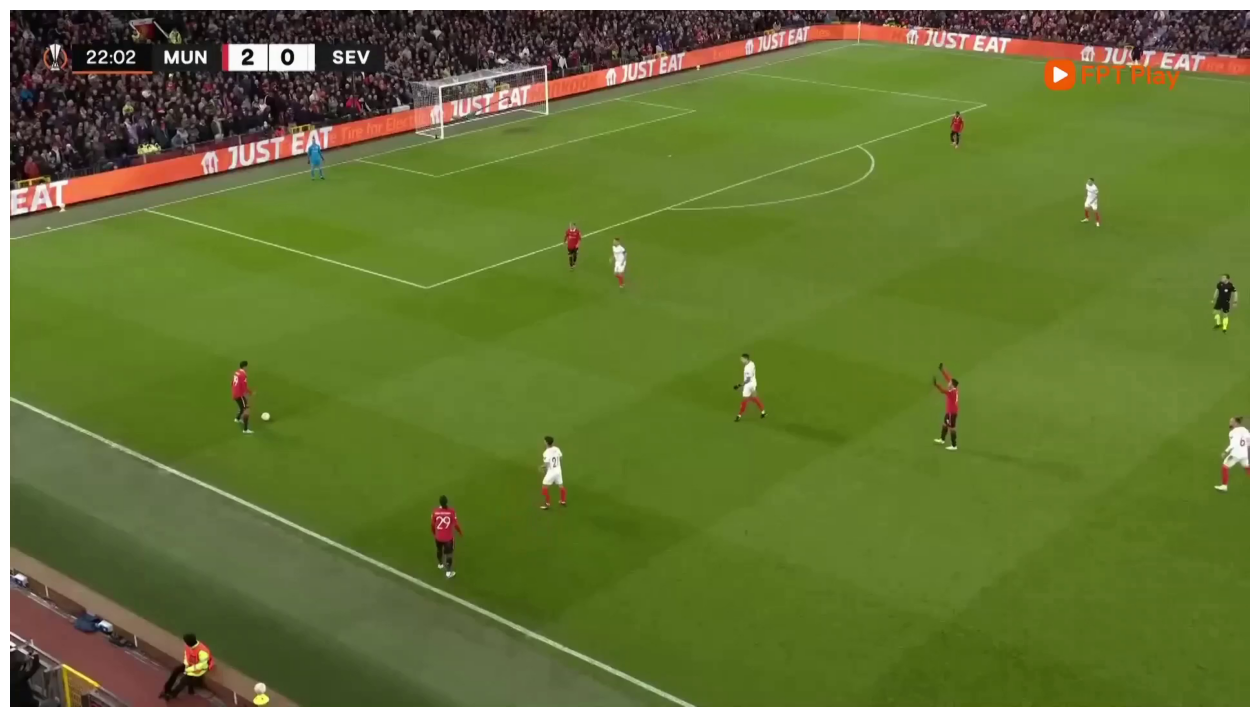

In [66]:
frame_iterator = iter(generate_frames(video_file=SOURCE_VIDEO_PATH))
frame = next(frame_iterator)
plot_image(frame, 16)

# Init some setting for running
# Include: video, annotators, hsv classifier, ByteTrack and possession per team

In [67]:
# initiate video reader and writer
video = Video(input_path=SOURCE_VIDEO_PATH)
args.fps = video.video_capture.get(cv2.CAP_PROP_FPS)

# initiate annotators
THICKNESS = 4
player_home_annotator = BaseAnnotator(
    colors = HOME_COLOR,thickness=THICKNESS)
player_away_annotator = BaseAnnotator(
    colors = AWAY_COLOR,thickness=THICKNESS)
referee_annotator = BaseAnnotator(
    colors = REFEREE_COLOR,thickness=THICKNESS)

ball_marker_annotator = MarkerAnntator(
    color=BALL_MARKER_FILL_COLOR)
player_in_possession_marker_annotator = MarkerAnntator(
    color=PLAYER_MARKER_FILL_COLOR)

# HSV Classifier
filters = filters(args)
hsv_classifier = HSVClassifier(filters=filters)
# Add inertia to classifier
classifier = InertiaClassifier(classifier=hsv_classifier, inertia=20)
possession_background  = get_possession_background(board_img = BOARD_IMG_PATH)
# initiate tracker
byte_tracker = BYTETracker(BYTETrackerArgs())
team_possession = {}

# Now run this cell to start analyzing your football match video

In [68]:
# loop over frames
for index, frame in enumerate(video):

    # initiate annotate video frame
    annotated_image = frame.copy()

    #------------------------------------------------------------RUN DETECTION AND CONVERT TO DETECTION CLASS------------------------------------------------------------#

    frame_rgb = frame[...,::-1].copy()
    results = model(frame_rgb, size=1280)
    detections = Detection.from_numpy(
        pred=results.pred[0].cpu().numpy().copy(),
        names=model.names)

    #------------------------------------------------------------FILTER OF BALL AND PERSON------------------------------------------------------------#

    ball_detections = filter_class(detections=detections.copy(), class_id=0)
    ball_detection = true_ball(detections=ball_detections.copy(), ball_confidence = args.ball_conf)

    tracked_person_detections = filter_class(detections=detections.copy(), class_id=0, reverse=True)

    #------------------------------------------------------------TRACKING AND MATCH TO DETECTION------------------------------------------------------------#

    if len(tracked_person_detections) != 0:
        tracks = byte_tracker.update(
                output_results=detections2boxes(detections=tracked_person_detections.copy()),
                img_info=frame.shape,
                img_size=frame.shape
        )
        tracked_detections = match_detections_with_tracks(detections=tracked_person_detections.copy(), tracks=tracks.copy())

        #------------------------------------------------------------CLASSIFY TWO TEAM AND REFEREE------------------------------------------------------------#

        tracked_person_detections_pd = classifier.predict_from_detections(detections=tracked_detections.copy(), img=frame.copy())

        tracked_referee_detections = filter_classification(detections = tracked_person_detections_pd.copy(), classification="Referee")
        tracked_player_home_detections = filter_classification(detections = tracked_person_detections_pd.copy(), classification = args.teams_name[0])
        tracked_player_away_detections = filter_classification(detections = tracked_person_detections_pd.copy(), classification = args.teams_name[1])
        player_detections = tracked_player_home_detections + tracked_player_away_detections

        #------------------------------------------------------------FIND PLAYER IN POSSESSION OF BALL------------------------------------------------------------#

        player_in_possession_detection = get_player_in_possession(
                                         player_detections=player_detections.copy(),
                                         ball_detections=[ball_detection] if ball_detection else [],
                                         proximity=PLAYER_IN_POSSESSION_PROXIMITY)

        team_possession = get_team_in_possession(
                          team_possession = team_possession.copy(),
                          player_possession = player_in_possession_detection,
                          args=args)

        player_in_possession_detection = inertia_possession(player_possession = player_in_possession_detection, team_possession = team_possession.copy())

        #------------------------------------------------------------ANNOTATE ON FRAME------------------------------------------------------------#

        annotated_image = player_home_annotator.annotate(
          image=annotated_image.copy(),
          detections=tracked_player_home_detections.copy())

        annotated_image = player_away_annotator.annotate(
          image=annotated_image.copy(),
          detections=tracked_player_away_detections.copy())

        annotated_image = referee_annotator.annotate(
          image=annotated_image.copy(),
          detections=tracked_referee_detections.copy())

        annotated_image = ball_marker_annotator.annotate(
          image=annotated_image.copy(),
          detections=[ball_detection] if ball_detection else [],
          width = MARKER_WIDTH,
          height = MARKER_HEIGHT,
          margin = MARKER_MARGIN,
          thickness = MARKER_CONTOUR_THICKNESS,
          color_contour=MARKER_CONTOUR_COLOR)

        annotated_image = player_in_possession_marker_annotator.annotate(
          image=annotated_image.copy(),
          detections=[player_in_possession_detection] if player_in_possession_detection else [],
          width = MARKER_WIDTH,
          height = MARKER_HEIGHT,
          margin = MARKER_MARGIN,
          thickness = MARKER_CONTOUR_THICKNESS,
          color_contour=MARKER_CONTOUR_COLOR)

        if args.possession:
           annotated_image = draw_possession_counter(
                             team_possession=team_possession.copy(),
                             frame=annotated_image.copy(),
                             counter_background=possession_background.copy(),
                             args=args)

    #------------------------------------------------------------SAVE ANNOTATED FRAME------------------------------------------------------------#

    video.write(annotated_image.copy())


Output()

AssertionError: ignored